# Модулятор 
# Double Sideband Suppressed Carrier 
# (AM-DSB-SC)

## 1. Введение
Амплитудная модуляция с подавленной несущей выполняется с помощью
умножения информационного сообщения на гармонический сигнал, который
называют неcущей (carrier). Схема модулятора представлена ниже:

<img src="../../images/DSB_SC_Transmitter_1.png" width=450/>

С помощью формул данный модулятор можно записать в следующем виде:

$$s_{\textrm{am}} \left(t\right)=m\left(t\right)\cdot A_c \cos \left(2\pi f_c t\right) \;\;\;\;(1),$$

где $m\left(t\right)$ - информационное сообщение, $A_c$ - амплитуда
несущей, $f_c$ - частота несущей, $s_{\textrm{am}} \left(t\right)$ -
модулированный сигнал.

Рассмотрим, что происходит в частотной области. Будем считать, что
спектр информационного сообщения равен

$$m\left(t\right)\iff M\left(f\right)$$.

Несущая представляет из себя гармонический сигнал, спектор которого
состоит из двух дельта-функций:

$$A_c \cos \left(2\pi f_c t\right)\iff \frac{A_c }{2}\left\lbrack \delta \left(f+f_c \right)+\delta \left(f-f_c \right)\right\rbrack$$.

Произведение сигналов во временной области соответствует свертке их
спектров в частотной области. Свертка с дельта-функцей соответствует
переносу спектра по частоте. Таким обзом, модулированный сигнал будет
состоять из двух копий спектров информационного сообщения, сдвинутых на
частоты $f_c$ и ${-f}_c$:

$$m\left(t\right)\cdot A_c \cos \left(2\pi f_c t\right)\iff \frac{A_c }{2}M\left(f+f_c \right)+\frac{A_c }{2}M\left(f-f_c \right)  \;\;\;\;(2)$$.


Далее рассмотрим несколько частных случаев: однотональную модуляцию,
модуляцию неколькими тонами и модуляцию аудиосигналом.

## 2. Однотональная модуляция
В случае однотональной модуляции информационное сообщение представляет
из себя гармонический сигнал вида:

$$m\left(t\right)=A_m \cos \left(2\pi f_m t\right),$$

где $A_m$ - амплитуда тона, $f_m$ - частота в герцах.

Подставим этот гармонический сингнал в формулу (1) и получим:

$$s_{\textrm{am}} \left(t\right)=A_m \cos \left(2\pi f_m t\right)\cdot A_c \cos \left(2\pi f_c t\right) \;\;\;(3).$$

Ниже представлен скрипт для получения графика сигнала после
однотональной модуляции:

<IPython.core.display.Javascript object>


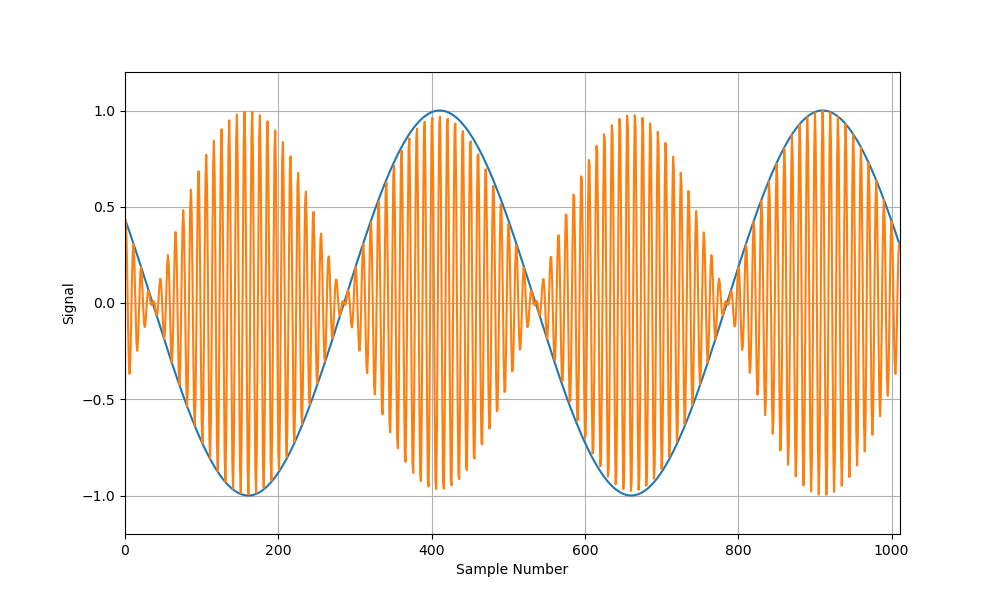

In [41]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import time

frame_size = 1011;   # размер обрабатываемой за один раз пачки данных
fs = 500e3;          # тактовая частота (Hz)

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Sample Number')
ax.set_ylabel('Signal')
ax.set_xlim(0, frame_size)
ax.set_ylim(-1.2, 1.2)
ax.grid(True)

# создаем линии для будущих графиков
for _ in range(2):
    ax.plot(np.arange(frame_size), np.zeros(frame_size))

# отсчеты времени
t = np.linspace(0, frame_size/fs, frame_size) 

# запуск симуляции
for _ in range(100):
 
    # информационное сообщение
    # частота тона: 1 kHz
    message = np.cos(2 * np.pi * 1e3 * t)
    
    # несущий сигнал
    # частота несущей: 50 kHz
    carrier = np.cos(2 * np.pi * 50e3 * t)
    
    # амплитудная модуляция
    am_signal = message * carrier

    # вывод результатов на график
    ax.lines[0].set_ydata(message)
    ax.lines[1].set_ydata(am_signal)
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + frame_size/fs 
    
    # задержка в 0.05 секунды для лучшей визуализации
    time.sleep(0.05)

Можно увидеть, что амплитуда несущей соответствует амплитуде
информационного сообщения. Если информационное сообщение принимает
отрицательное значение, то фаза несущей изменяется на $\pi$.

Теперь рассмотрим частотную область. Применив в формуле (3) правило
произведения косинусов, преобразуем результат к следующему виду:

$$s_{\textrm{am}} \left(t\right)=\frac{A_m A_c }{2}\left\lbrack \cos \left(2\pi \left(f_m +f_c \right)t\right)+\cos \left(2\pi \left(f_m -f_c \right)t\right)\right\rbrack.$$

Такми образом, результат однотональной модуляции равен сумме двух
гармонических сигналов, частоты которых равны $f_m +f_c$ и $f_m -f_c$
Гц. В частотной области это соответствует спектру:

$$s_{\textrm{am}} \left(t\right)\iff \frac{A_m A_c }{4}\left\lbrack \delta \left(f+f_c +f_m \right)+\delta \left(f+f_c -f_m \right)+\delta \left(f-f_c +f_m \right)+\delta \left(f-f_c -f_m \right)\right\rbrack.$$

Этот результат можно получить, если учесть формуле (2) и, что спектр
информацонного сигнала равен:

$$A_m \cos \left(2\pi f_m t\right)\iff \frac{A_m }{2}\left\lbrack \delta \left(f+f_m \right)+\delta \left(f-f_m \right)\right\rbrack.$$

<IPython.core.display.Javascript object>


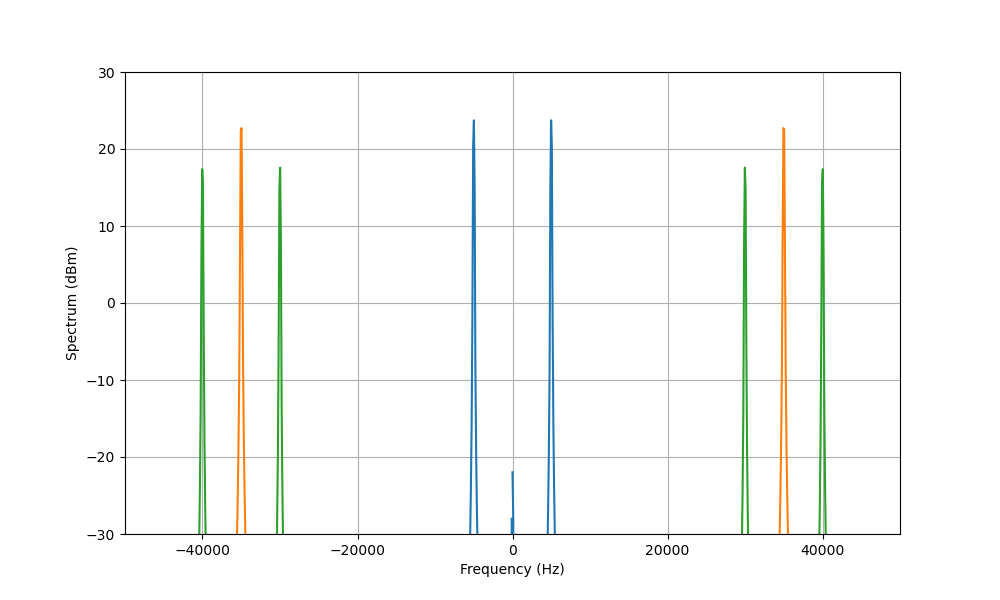

In [42]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.signal import welch

frame_size = 5000;   # размер обрабатываемой за один раз пачки данных
fs = 100e3;          # тактовая частота (Hz)

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-fs/2, fs/2)
ax.set_ylim(-30, 30)
ax.grid(True)

# создаем три линии для будущих графиков
for _ in range(3):
    ax.plot(np.arange(frame_size), np.zeros(frame_size))

# постоеные осей графиков
t = np.linspace(0, frame_size/fs, frame_size) # отсчеты времени
    
# запуск симуляции
for frame in range(100):

    # информационное сообщение
    # частота тона: 5 kHz
    message = np.cos(2 * np.pi * 5e3 * t)
    
    # несущий сигнал
    # частота несущей: 35 kHz
    carrier = np.cos(2 * np.pi * 35e3 * t)
    
    # амплитудная модуляция
    am_signal = message * carrier

    # посторение спектрограмм
    signals = message, carrier, am_signal
    
    for i in range(3):
        f, spectrum = welch(signals[i], fs, return_onesided=False, scaling='spectrum', nperseg=1024) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                    # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + frame_size/fs 
    
    # задержка в 0.01 секунды для лучшей визуализации
    time.sleep(0.01)

На графике представлен спектр информационного сигнала (синий) и спектр
несущей (оранжевый). Эти сигналы гармонические, поэтому им соответствуют
гармоники на частотах $f_m$ и $f_c$ соответственно. Спектр
модулированного сигнала для однотонального случая (зеленый) состоит их
четырех дельта-функций.

## 3. Модуляция несколькими тонами
Разобравшись с однотональной модуляцией, легко распространить результаты
на случай модуляции несколькими тонами. Пусть информационный сигнал
представляет из себя сумму гармонических сигналов:

$$m\left(t\right)=\sum_{i=1}^N A_i \cos \left(2\pi f_i t\right),$$

где $A_i$ - амплитада i-ой гармоники, $f_i$ - частота i-ой гармоники,
$N$ - число гармоник.

В случае, если в модуляции учавствуют три тона, график сигнала будет
иметь вид:

<IPython.core.display.Javascript object>


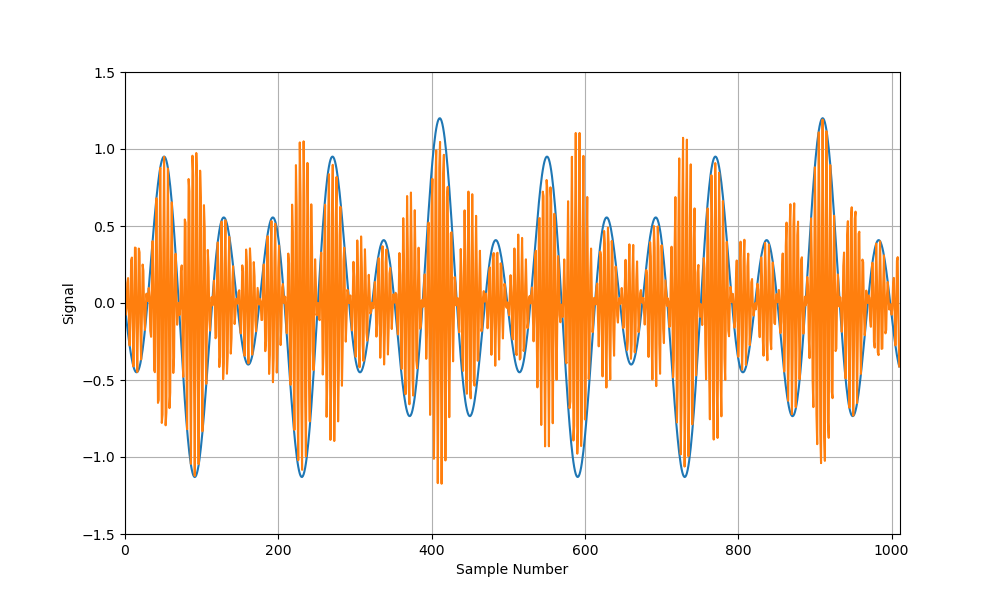

In [43]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import time

frame_size = 1011;   # размер обрабатываемой за один раз пачки данных
fs = 500e3;          # тактовая частота (Hz)

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Sample Number')
ax.set_ylabel('Signal')
ax.set_xlim(0, frame_size)
ax.set_ylim(-1.5, 1.5)
ax.grid(True)

# создаем линии для будущих графиков
for _ in range(2):
    ax.plot(np.arange(frame_size), np.zeros(frame_size))

# отсчеты времени
t = np.linspace(0, frame_size/fs, frame_size) 

# запуск симуляции
for frame in range(100):
    
    # информационное сообщение
    # частота тонов: 1, 4 и 7 kHz
    # амплитуды тонов: 0.1, 0.5 и 0.7
    message = 0.1 * np.cos(2 * np.pi * 1e3 * t)
    message += 0.4 * np.cos(2 * np.pi * 4e3 * t)
    message += 0.7 * np.cos(2 * np.pi * 7e3 * t)
    
    # несущий сигнал
    # частота несущей: 100 kHz
    carrier = np.cos(2 * np.pi * 100e3 * t)
    
    # амплитудная модуляция
    am_signal = message * carrier

    # вывод результатов на график
    ax.lines[0].set_ydata(message)
    ax.lines[1].set_ydata(am_signal)
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + frame_size/fs 
    
    # задержка в 0.05 секунды для лучшей визуализации
    time.sleep(0.05)

Рассмотрим, что происходит в частотной области. В случае модуляции
несколькими тонами модулированный сигнал примет следующий вид:

$$s_{\textrm{am}} \left(t\right)=\sum_{i=1}^N A_i \cos \left(2\pi f_i t\right)\cdot A_c \cos \left(2\pi f_c t\right)=\frac{A_c }{2}\sum_{i=1}^N A_i \left\lbrack \cos \left(2\pi \left(f_i +f_c \right)t\right)+\cos \left(2\pi \left(f_i -f_c \right)t\right)\right\rbrack.$$

То есть после модуляции каждому тону будут соответстовать две гармоники
на частотах $f_i +f_c$ и $f_i -f_c$. Можно сказать по другому: каждый
отдельный тон информационного сигнала будет сдвинут по частоте на $f_c$.
Построим спектры сигналов для случая модуляции тремя тонами.


<IPython.core.display.Javascript object>


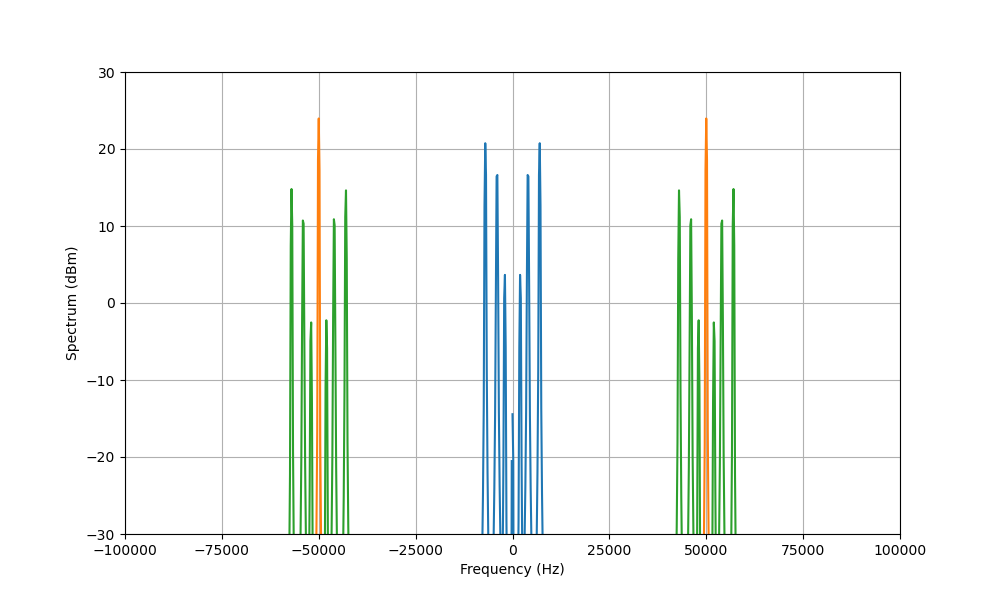

In [44]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.signal import welch

frame_size = 5000;   # размер обрабатываемой за один раз пачки данных
fs = 200e3;          # тактовая частота (Hz)

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-fs/2, fs/2)
ax.set_ylim(-30, 30)
ax.grid(True)

# создаем три линии для будущих графиков
for _ in range(3):
    ax.plot(np.arange(frame_size), np.zeros(frame_size))

# постоеные осей графиков
t = np.linspace(0, frame_size/fs, frame_size) # отсчеты времени

# запуск симуляции
for frame in range(100):
        
    # информационное сообщение
    # частота тонов: 2, 4 и 7 kHz
    # амплитуды тонов: 0.1, 0.5 и 0.7
    message = 0.1 * np.cos(2 * np.pi * 2e3 * t)
    message += 0.5 * np.cos(2 * np.pi * 4e3 * t)
    message += 0.7 * np.cos(2 * np.pi * 7e3 * t)
    
    # несущий сигнал
    # частота несущей: 50 kHz
    carrier = np.cos(2 * np.pi * 50e3 * t)
    
    # амплитудная модуляция
    am_signal = message * carrier

    # посторение спектрограмм
    signals = message, carrier, am_signal
    
    for i in range(3):
        f, spectrum = welch(signals[i], fs, return_onesided=False, scaling='spectrum', nperseg=1024) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                    # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + frame_size/fs 
    
    # задержка в 0.01 секунды для лучшей визуализации
    time.sleep(0.01)

Можно увидеть, что спектр модулированного сигнала (зеленый) соответсвует
спектру информационного сообщения (синий), сдвинутому на частоту
несущей (оранжевый).

## 4. Модуляция звуковым сигналом
Рассмотрим, как будет выглядеть спектр сигнала после модуляции, если
информационное сообщение является аудиосигналом. В файле
Audio\_Source.wav записано звуковое сообщение с частотой дискретизации
44.1 kHz. Частота несущей будет равна 60 kHz. Чтобы избежать наложения
спектров, выберем итоговую частоту дискретизации модулированного сигнала
в 5 раз больше частоты аудиосигнала, то есть 5 \* 44.1 kHz. Это
потребует провести интерполяцию для увеличения частоты дискретизации
информационного сообщения.


<IPython.core.display.Javascript object>


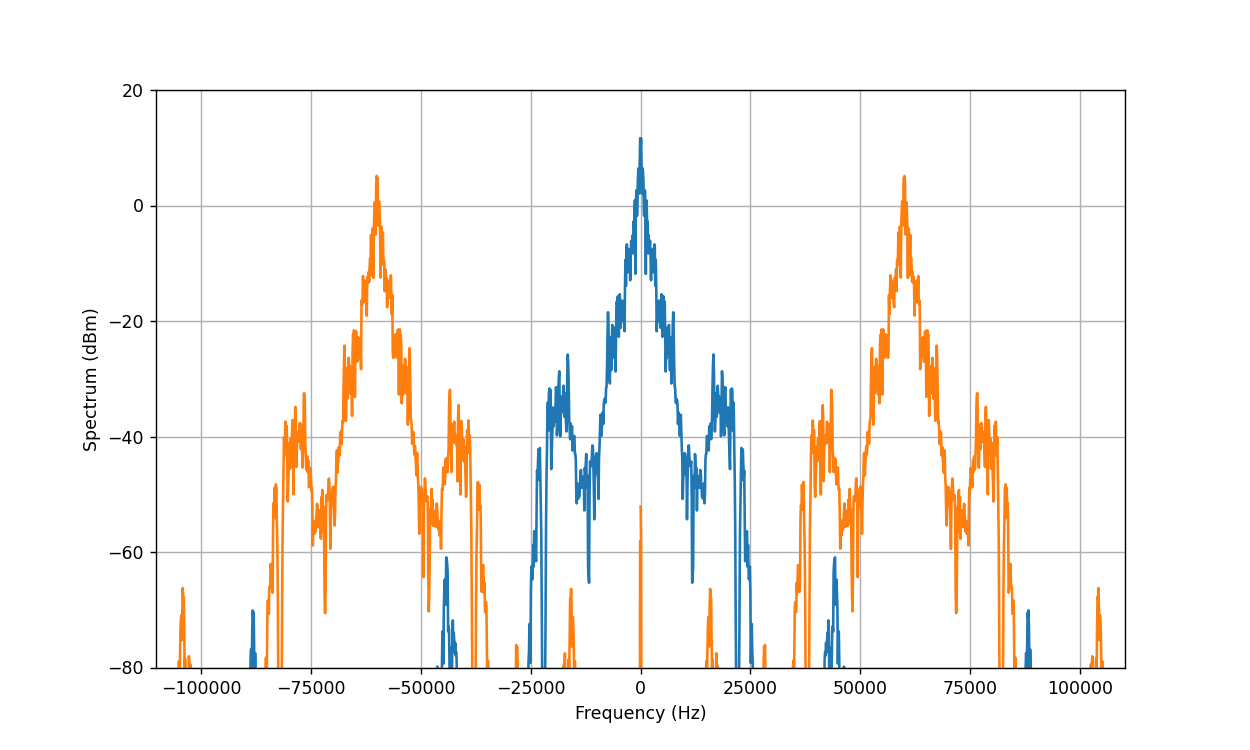

In [1]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import time, wave

from scipy.signal import welch, resample_poly

audio_frame_size = 1000  # количество отсчетов аудиофайла, получаемых за один раз
frames_number = 100      # число обрабатываемых пачек данных
rate_ratio = 5           # коэффициент увеличения частоты дискретизации

# открываем файл и получаем частоту дискретизации
audio_file = wave.open('../../wav/Audio_Source.wav')
audio_fs = audio_file.getframerate()

# частота дискретизации и размер кадра после передискретизации
signal_fs = audio_fs * rate_ratio
signal_frame_size = audio_frame_size * rate_ratio

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-signal_fs/2, signal_fs/2)
ax.set_ylim(-80, 20)
ax.grid(True)

# создаем линии для будущих графиков
for _ in range(2):
    ax.plot(np.arange(signal_frame_size), np.zeros(signal_frame_size))

# отсчеты времени
t = np.linspace(0, signal_frame_size/signal_fs, signal_frame_size) 

# запуск симуляции
for frame in range(frames_number):

    # формирование отсчетов аудиосигнала
    audio_data = audio_file.readframes(audio_frame_size)    # считываем отсчеты
    audio_data = np.frombuffer(audio_data, dtype=np.int16)  # преобразуем тип данных из byte в int16
    audio_data = np.reshape(audio_data, (-1, 2))            # разделяем отсчеты для правого и левого канала
    audio_data = audio_data / 2**15                         # нормируем отсчеты к единице
            
    # выделяем один канал и увеличиваем частоту дискретизации
    upsampled_data = resample_poly(audio_data[:,0], rate_ratio, 1)
    
    # несущий сигнал
    # частота несущей: 60 kHz
    carrier = np.cos(2 * np.pi * 60e3 * t)
    
    # амплитудная модуляция
    am_signal = upsampled_data * carrier

    # посторение спектрограмм
    signals = upsampled_data, am_signal
    
    for i in range(2):
        f, spectrum = welch(signals[i], signal_fs, return_onesided=False, scaling='spectrum', nperseg=2048) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                           # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + signal_frame_size/signal_fs 
    
    # задержка в 0.01 секунды для лучшей визуализации
    time.sleep(0.01)


Можно увидеть, что спектр информационного сообщения перенесен на частоту
несущей.

## 5. Преимущества и недостатки DSB-SC
Преимущества:
- простота модулятора;
- модуляция эффективна с точки зрения мощности, так как несущая не передается.

Недостатки:
- если информационное сообщение изменяет знак, то возможна только когерентная демодуляция;
- несущая не передается, ее нужно восстанавливать из сигнала, это усложняет демодулятор;
- полоса модулированного сигнала в 2 раза больше полосы информационного сообщения.

## Литература:
- B. P. Lathi Modern Digital and Analog Communication Systems 
- R. Stewart, K. Barlee, D. Atkinson, L. Crockett Software Defined Radio using MATLAB® & Simulink and the RTL-SDR